In [7]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Configure for presentation
np.set_printoptions(threshold=50, linewidth=50)
import matplotlib as mpl
mpl.rc('font', size=16)

## Drinks

In [8]:
drinks = Table(['Drink', 'Cafe', 'Price']).with_rows([
    ['Milk Tea', 'Panda Tea Lounge', 4],
    ['Espresso', 'Gimme',  2],
    ['Latte',    'Gimme',  3],
    ['Espresso', "Cafe Gola",   2]
])
drinks

Drink,Cafe,Price
Milk Tea,Panda Tea Lounge,4
Espresso,Gimme,2
Latte,Gimme,3
Espresso,Cafe Gola,2


In [9]:
discounts = Table().with_columns(
    'Coupon % off', make_array(25, 50, 5),
    'Location', make_array('Panda Tea Lounge', 'Gimme', 'Gimme')
)
discounts

Coupon % off,Location
25,Panda Tea Lounge
50,Gimme
5,Gimme


In [10]:
t = drinks.join('Cafe', discounts, 'Location')
t

Cafe,Drink,Price,Coupon % off
Gimme,Espresso,2,50
Gimme,Espresso,2,5
Gimme,Latte,3,50
Gimme,Latte,3,5
Panda Tea Lounge,Milk Tea,4,25


In [11]:
t.with_column('Discounted', t.column(2) * (1 - t.column(3)/ 100))

Cafe,Drink,Price,Coupon % off,Discounted
Gimme,Espresso,2,50,1
Gimme,Espresso,2,5,1.9
Gimme,Latte,3,50,1.5
Gimme,Latte,3,5,2.85
Panda Tea Lounge,Milk Tea,4,25,3


In [6]:
two = drinks.join('Cafe', drinks)
two

Cafe,Drink,Price,Drink_2,Price_2
Cafe Gola,Espresso,2,Espresso,2
Gimme,Espresso,2,Espresso,2
Gimme,Espresso,2,Latte,3
Gimme,Latte,3,Espresso,2
Gimme,Latte,3,Latte,3
Panda Tea Lounge,Milk Tea,4,Milk Tea,4


In [12]:
two.with_column('Total', two.column('Price') + two.column('Price_2'))

NameError: name 'two' is not defined

## Bikes

In [13]:
citi = Table.read_table('citibike_nyc_201707_500000.csv')
citi

tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
364,2017-07-01 00:00:00,2017-07-01 00:06:05,539,Metropolitan Ave & Bedford Ave,40.7153,-73.9602,3107,Bedford Ave & Nassau Ave,40.7231,-73.9521,14744,Subscriber,1986,1
2142,2017-07-01 00:00:03,2017-07-01 00:35:46,293,Lafayette St & E 8 St,40.7302,-73.991,3425,2 Ave & E 104 St,40.7892,-73.9437,19587,Subscriber,1981,1
328,2017-07-01 00:00:08,2017-07-01 00:05:37,3242,Schermerhorn St & Court St,40.691,-73.9918,3397,Court St & Nelson St,40.6764,-73.9987,27937,Subscriber,1984,2
2530,2017-07-01 00:00:11,2017-07-01 00:42:22,2002,Wythe Ave & Metropolitan Ave,40.7169,-73.9632,398,Atlantic Ave & Furman St,40.6917,-74,26066,Subscriber,1985,1
2534,2017-07-01 00:00:15,2017-07-01 00:42:29,2002,Wythe Ave & Metropolitan Ave,40.7169,-73.9632,398,Atlantic Ave & Furman St,40.6917,-74,29408,Subscriber,1982,2
545,2017-07-01 00:00:18,2017-07-01 00:09:24,361,Allen St & Hester St,40.7161,-73.9919,502,Henry St & Grand St,40.7142,-73.9813,21203,Subscriber,1954,2
1496,2017-07-01 00:00:18,2017-07-01 00:25:15,3233,E 48 St & 5 Ave,40.7572,-73.9781,546,E 30 St & Park Ave S,40.7444,-73.983,15933,Customer,1971,1
1495,2017-07-01 00:00:19,2017-07-01 00:25:15,3233,E 48 St & 5 Ave,40.7572,-73.9781,546,E 30 St & Park Ave S,40.7444,-73.983,18515,Customer,1964,2
593,2017-07-01 00:00:27,2017-07-01 00:10:20,3314,W 95 St & Broadway,40.7938,-73.9719,3363,E 102 St & Park Ave,40.7905,-73.9503,29135,Subscriber,1982,1
1950,2017-07-01 00:00:30,2017-07-01 00:33:00,3085,Roebling St & N 4 St,40.7147,-73.9574,468,Broadway & W 56 St,40.7653,-73.9819,17365,Subscriber,1983,1


In [14]:
trips = citi.relabeled("start station name", "start")\
            .relabeled("end station name", "end")\
            .select("start", "end")\
            .with_column("duration", citi.column("tripduration")/60)
trips

start,end,duration
Metropolitan Ave & Bedford Ave,Bedford Ave & Nassau Ave,6.06667
Lafayette St & E 8 St,2 Ave & E 104 St,35.7
Schermerhorn St & Court St,Court St & Nelson St,5.46667
Wythe Ave & Metropolitan Ave,Atlantic Ave & Furman St,42.1667
Wythe Ave & Metropolitan Ave,Atlantic Ave & Furman St,42.2333
Allen St & Hester St,Henry St & Grand St,9.08333
E 48 St & 5 Ave,E 30 St & Park Ave S,24.9333
E 48 St & 5 Ave,E 30 St & Park Ave S,24.9167
W 95 St & Broadway,E 102 St & Park Ave,9.88333
Roebling St & N 4 St,Broadway & W 56 St,32.5


How long do people generally borrow a bike for?

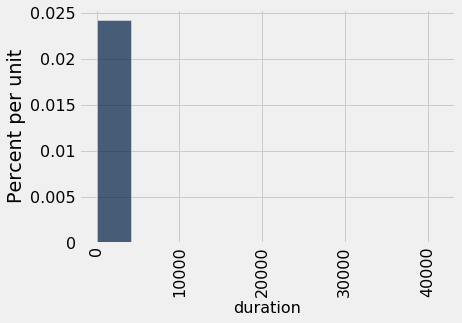

In [15]:
trips.hist("duration")

In [16]:
longest = trips.column("duration").max()
print("Longest trip took", longest/60, "hours.")

Longest trip took 688.1172222222223 hours.


Citibike charges an extra $2.50 for rides longer than 45 minutes

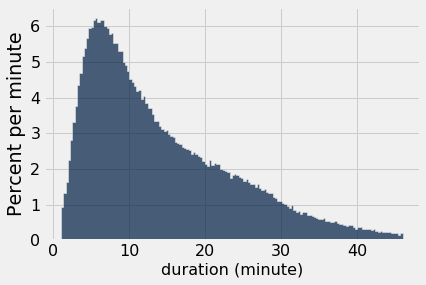

In [19]:
commute = trips.where('duration', are.below(46))
commute.hist('duration', bins=150, unit='minute')

Where did people pick up bikes?

In [20]:
starts = commute.group('start').sort('count', descending=True)
starts

start,count
West St & Chambers St,4261
12 Ave & W 40 St,3984
Pershing Square North,3668
E 17 St & Broadway,3115
W 20 St & 11 Ave,3013
W 21 St & 6 Ave,2900
Central Park S & 6 Ave,2838
Centre St & Chambers St,2783
Pier 40 - Hudson River Park,2603
Carmine St & 6 Ave,2585


* West St & Chambers St is near Stuyvesant High School, Borough of Manhattan Community College, and another ferry terminal, on the Hudson greenway bike trail
* 12 Ave & W 40 St is a ferry terminal on the Hudson greenway bike trail
* Pershing Square North is across from Grand Central Station

In [14]:
commute.pivot('start', 'end')

end               | 1 Ave & E 16 St | 1 Ave & E 18 St | 1 Ave & E 30 St | 1 Ave & E 44 St | 1 Ave & E 62 St | 1 Ave & E 68 St | 1 Ave & E 78 St | 1 Ave & E 94 St | 1 Pl & Clinton St | 10 Hudson Yards | 10 St & 5 Ave | 10 St & 7 Ave | 11 Ave & W 27 St | 11 Ave & W 41 St | 11 Ave & W 59 St | 12 Ave & W 40 St | 12 St & 4 Ave | 14 St & 5 Ave | 14 St & 7 Ave | 2 Ave  & E 104 St | 2 Ave & 9 St | 2 Ave & E 31 St | 2 Ave & E 96 St | 2 Ave & E 99 St | 21 St & 43 Ave | 21 St & Queens Plaza North | 3 Ave & 14 St | 3 Ave & E 100 St | 3 Ave & E 62 St | 3 Ave & E 71 St | 3 Ave & E 72 St | 3 St & 3 Ave | 3 St & 7 Ave | 3 St & Hoyt St | 3 St & Prospect Park West | 31 St & Thomson Ave | 4 Ave & 2 St | 4 Ave & 9 St | 44 Dr & Jackson Ave | 45 Rd & 11 St | 46 Ave & 5 St | 47 Ave & 31 St | 48 Ave & 5 St | 5 Ave & 3 St | 5 Ave & E 103 St | 5 Ave & E 29 St | 5 Ave & E 63 St | 5 Ave & E 73 St | 5 Ave & E 78 St | 5 Ave & E 88 St | 5 Ave & E 93 St | 5 St & 6 Ave | 6 Ave & 12 St | 6 Ave & 9 St | 6 Ave & Canal St | 6 Ave & Spring St | 6 Ave & W 33 St | 6 St & 7 Ave | 7 Ave & Park Pl | 7 St & 3 Ave | 7 St & 5 Ave | 8 Ave & W 16 St | 8 Ave & W 31 St | 8 Ave & W 33 St | 8 Ave & W 52 St | 9 Ave & W 18 St | 9 Ave & W 22 St | 9 Ave & W 28 St | 9 Ave & W 45 St | 9 St & 44 Rd | Adelphi St & Myrtle Ave | Albany Ave & Fulton St | Allen St & Hester St | Allen St & Rivington St | Allen St & Stanton St | Amsterdam Ave & W 66 St | Amsterdam Ave & W 73 St | Amsterdam Ave & W 79 St | Amsterdam Ave & W 82 St | Atlantic Ave & Fort Greene Pl | Atlantic Ave & Furman St | Avenue D & E 12 St | Avenue D & E 3 St | Avenue D & E 8 St | Baltic St & 5 Ave | Bank St & Hudson St | Bank St & Washington St | Banker St & Meserole Ave | Barclay St & Church St | Barrow St & Hudson St | Bayard St & Baxter St | Bayard St & Leonard St | Bedford Ave & Nassau Ave | Bedford Ave & S 9 St | Bergen St & Flatbush Ave | Bergen St & Smith St | Berkeley Pl & 6 Ave | Berkeley Pl & 7 Ave | Berry St & N 8 St | Bialystoker Pl & Delancey St | Boerum St & Broadway | Bond St & Bergen St | Bond St & Fulton St | Bond St & Schermerhorn St | Broad St & Bridge St | Broadway & Battery Pl | Broadway & Berry St | Broadway & E 14 St | Broadway & E 22 St | Broadway & Roebling St | Broadway & W 24 St | Broadway & W 29 St | Broadway & W 32 St | Broadway & W 36 St | Broadway & W 41 St | Broadway & W 49 St | Broadway & W 51 St | Broadway & W 53 St | Broadway & W 56 St | Broadway & W 58 St | Broadway & W 60 St | Broadway & Whipple St | Brooklyn Bridge Park - Pier 2 | Bus Slip & State St | Bushwick Ave & Powers St | Butler St & Court St | Cadman Plaza E & Red Cross Pl | Cadman Plaza E & Tillary St | Cadman Plaza West & Montague St | Cambridge Pl & Gates Ave | Carlton Ave & Flushing Ave | Carlton Ave & Park Ave | Carmine St & 6 Ave | Carroll St & 5 Ave | Carroll St & 6 Ave | Carroll St & Bond St | Carroll St & Columbia St | Carroll St & Smith St | Cathedral Pkwy & Broadway | Catherine St & Monroe St | Center Blvd & Borden Ave | Central Park North & Adam Clayton Powell Blvd | Central Park S & 6 Ave | Central Park W & W 96 St | Central Park West & W 100 St | Central Park West & W 102 St | Central Park West & W 68 St | Central Park West & W 72 St | Central Park West & W 76 St | Central Park West & W 85 St | Centre St & Chambers St | Centre St & Worth St | Cherry St | Christopher St & Greenwich St | Clark St & Henry St | Clermont Ave & Lafayette Ave | Clermont Ave & Park Ave | Cleveland Pl & Spring St | Cliff St & Fulton St | Clinton Ave & Flushing Ave | Clinton Ave & Myrtle Ave | Clinton St & 4 Place | Clinton St & Centre St | Clinton St & Grand St | Clinton St & Joralemon St | Clinton St & Tillary St | Clinton St & Union St | Coffey St & Conover St | Columbia Heights & Cranberry St | Columbia St & Degraw St | Columbia St & Kane St | Columbia St & Lorraine St | Columbia St & Rivington St | Columbia St & W 9 St | Columbus Ave & W 103 St | Columbus Ave & W 72 St | Columbus Ave & W 95 St | Commerce St & Van Brunt St | Concord St 

In [21]:
shortest = commute.group(["start", "end"], min)
shortest

start,end,duration min
1 Ave & E 16 St,1 Ave & E 16 St,1.46667
1 Ave & E 16 St,1 Ave & E 18 St,1.1
1 Ave & E 16 St,1 Ave & E 30 St,4.13333
1 Ave & E 16 St,1 Ave & E 44 St,8.41667
1 Ave & E 16 St,1 Ave & E 62 St,14.2167
1 Ave & E 16 St,1 Ave & E 68 St,11.2333
1 Ave & E 16 St,1 Ave & E 78 St,19.8333
1 Ave & E 16 St,1 Ave & E 94 St,42.1
1 Ave & E 16 St,10 Hudson Yards,16.3167
1 Ave & E 16 St,11 Ave & W 41 St,23.1833


Which stations can you get to fastest from Grand Central Station ('Pershing Square North')?

In [22]:
from_gc = shortest.where("start", are.containing('Pershing Square North')).sort(2)
from_gc

start,end,duration min
Pershing Square North,Pershing Square North,1.01667
Pershing Square North,E 41 St & Madison Ave,1.25
Pershing Square North,Pershing Square South,1.76667
Pershing Square North,E 40 St & 5 Ave,1.9
Pershing Square North,E 44 St & 2 Ave,1.9
Pershing Square North,E 39 St & 3 Ave,2.03333
Pershing Square North,W 43 St & 6 Ave,2.3
Pershing Square North,W 37 St & 5 Ave,2.35
Pershing Square North,E 35 St & 3 Ave,2.8
Pershing Square North,E 48 St & 3 Ave,2.8


## Maps

In [23]:
stations = citi.relabeled("start station name", "name")\
                .relabeled("start station latitude", "lat")\
                .relabeled("start station longitude", "lon")\
                .select("name", "lat", "lon")
stations

name,lat,lon
Metropolitan Ave & Bedford Ave,40.7153,-73.9602
Lafayette St & E 8 St,40.7302,-73.991
Schermerhorn St & Court St,40.691,-73.9918
Wythe Ave & Metropolitan Ave,40.7169,-73.9632
Wythe Ave & Metropolitan Ave,40.7169,-73.9632
Allen St & Hester St,40.7161,-73.9919
E 48 St & 5 Ave,40.7572,-73.9781
E 48 St & 5 Ave,40.7572,-73.9781
W 95 St & Broadway,40.7938,-73.9719
Roebling St & N 4 St,40.7147,-73.9574


How many trips started at each station?

In [24]:
unique_stations = stations.group(["name", "lat", "lon"])
unique_stations

name,lat,lon,count
1 Ave & E 16 St,40.7322,-73.9817,1990
1 Ave & E 18 St,40.7338,-73.9805,1559
1 Ave & E 30 St,40.7414,-73.9754,1207
1 Ave & E 44 St,40.75,-73.9691,908
1 Ave & E 62 St,40.7612,-73.9609,1327
1 Ave & E 68 St,40.765,-73.9582,1492
1 Ave & E 78 St,40.7714,-73.9535,1213
1 Ave & E 94 St,40.7817,-73.9459,406
1 Pl & Clinton St,40.681,-73.9991,231
10 Hudson Yards,40.753,-74.0026,63


Map it!

In [25]:
Marker.map_table(unique_stations.select("lat", "lon", "name"))

/anaconda3/lib/python3.7/site-packages/datascience/maps.py:368: FutureWarning: simple_marker is deprecated. Use add_children(Marker) instead
  f(**self._folium_kwargs)


In [26]:
Circle.map_table(unique_stations.select("lat", "lon", "name"), color='green', radius=100)

/anaconda3/lib/python3.7/site-packages/datascience/maps.py:368: FutureWarning: circle_marker is deprecated. Use add_children(CircleMarker) instead
  f(**self._folium_kwargs)


In [21]:
blue_stations = unique_stations.with_columns(
    "color", np.full(unique_stations.num_rows, "blue"),
    "area", 50*unique_stations.column("count"))
blue_stations

name,lat,lon,count,color,area
1 Ave & E 16 St,40.7322,-73.9817,1990,blue,99500
1 Ave & E 18 St,40.7338,-73.9805,1559,blue,77950
1 Ave & E 30 St,40.7414,-73.9754,1207,blue,60350
1 Ave & E 44 St,40.75,-73.9691,908,blue,45400
1 Ave & E 62 St,40.7612,-73.9609,1327,blue,66350
1 Ave & E 68 St,40.765,-73.9582,1492,blue,74600
1 Ave & E 78 St,40.7714,-73.9535,1213,blue,60650
1 Ave & E 94 St,40.7817,-73.9459,406,blue,20300
1 Pl & Clinton St,40.681,-73.9991,231,blue,11550
10 Hudson Yards,40.753,-74.0026,63,blue,3150


In [22]:
Circle.map_table(blue_stations.select("lat", "lon", "name", "color", "area"))

How long does it take to get to any other station from grand central?

In [23]:
from_gc

start,end,duration min
Pershing Square North,Pershing Square North,1.01667
Pershing Square North,E 41 St & Madison Ave,1.25
Pershing Square North,Pershing Square South,1.76667
Pershing Square North,E 40 St & 5 Ave,1.9
Pershing Square North,E 44 St & 2 Ave,1.9
Pershing Square North,E 39 St & 3 Ave,2.03333
Pershing Square North,W 43 St & 6 Ave,2.3
Pershing Square North,W 37 St & 5 Ave,2.35
Pershing Square North,E 35 St & 3 Ave,2.8
Pershing Square North,E 48 St & 3 Ave,2.8


In [24]:
gc_dest = from_gc.join("end", unique_stations, "name")
gc_dest

end,start,duration min,lat,lon,count
1 Ave & E 16 St,Pershing Square North,10.3167,40.7322,-73.9817,1990
1 Ave & E 18 St,Pershing Square North,10.0667,40.7338,-73.9805,1559
1 Ave & E 30 St,Pershing Square North,5.96667,40.7414,-73.9754,1207
1 Ave & E 44 St,Pershing Square North,4.01667,40.75,-73.9691,908
1 Ave & E 62 St,Pershing Square North,8.93333,40.7612,-73.9609,1327
1 Ave & E 68 St,Pershing Square North,7.63333,40.765,-73.9582,1492
1 Ave & E 78 St,Pershing Square North,12.85,40.7714,-73.9535,1213
1 Ave & E 94 St,Pershing Square North,21.7333,40.7817,-73.9459,406
10 Hudson Yards,Pershing Square North,16.35,40.753,-74.0026,63
11 Ave & W 27 St,Pershing Square North,13.5667,40.7514,-74.0052,1778


In [25]:
color_from_gc = gc_dest.with_columns(
    "color", np.full(gc_dest.num_rows, "blue"),
    "area", 10000*gc_dest.column("duration min"))
color_from_gc

end,start,duration min,lat,lon,count,color,area
1 Ave & E 16 St,Pershing Square North,10.3167,40.7322,-73.9817,1990,blue,103167
1 Ave & E 18 St,Pershing Square North,10.0667,40.7338,-73.9805,1559,blue,100667
1 Ave & E 30 St,Pershing Square North,5.96667,40.7414,-73.9754,1207,blue,59666.7
1 Ave & E 44 St,Pershing Square North,4.01667,40.75,-73.9691,908,blue,40166.7
1 Ave & E 62 St,Pershing Square North,8.93333,40.7612,-73.9609,1327,blue,89333.3
1 Ave & E 68 St,Pershing Square North,7.63333,40.765,-73.9582,1492,blue,76333.3
1 Ave & E 78 St,Pershing Square North,12.85,40.7714,-73.9535,1213,blue,128500
1 Ave & E 94 St,Pershing Square North,21.7333,40.7817,-73.9459,406,blue,217333
10 Hudson Yards,Pershing Square North,16.35,40.753,-74.0026,63,blue,163500
11 Ave & W 27 St,Pershing Square North,13.5667,40.7514,-74.0052,1778,blue,135667


In [26]:
Circle.map_table(color_from_gc.select("lat", "lon", "end", "color", "area"))

About how long do people spend on trips from each station?

In [27]:
stations = citi.relabeled("start station name", "name")\
                .relabeled("start station latitude", "lat")\
                .relabeled("start station longitude", "lon")\
                .select("name", "lat", "lon")\
                .with_column("duration", citi.column("tripduration")/60)
stations

name,lat,lon,duration
Metropolitan Ave & Bedford Ave,40.7153,-73.9602,6.06667
Lafayette St & E 8 St,40.7302,-73.991,35.7
Schermerhorn St & Court St,40.691,-73.9918,5.46667
Wythe Ave & Metropolitan Ave,40.7169,-73.9632,42.1667
Wythe Ave & Metropolitan Ave,40.7169,-73.9632,42.2333
Allen St & Hester St,40.7161,-73.9919,9.08333
E 48 St & 5 Ave,40.7572,-73.9781,24.9333
E 48 St & 5 Ave,40.7572,-73.9781,24.9167
W 95 St & Broadway,40.7938,-73.9719,9.88333
Roebling St & N 4 St,40.7147,-73.9574,32.5


In [28]:
stations.group(["name", "lat", "lon"], np.median)

name,lat,lon,duration median
1 Ave & E 16 St,40.7322,-73.9817,8.88333
1 Ave & E 18 St,40.7338,-73.9805,9.88333
1 Ave & E 30 St,40.7414,-73.9754,11.0333
1 Ave & E 44 St,40.75,-73.9691,14.45
1 Ave & E 62 St,40.7612,-73.9609,12.3
1 Ave & E 68 St,40.765,-73.9582,11.9583
1 Ave & E 78 St,40.7714,-73.9535,11.8167
1 Ave & E 94 St,40.7817,-73.9459,12.95
1 Pl & Clinton St,40.681,-73.9991,8.73333
10 Hudson Yards,40.753,-74.0026,16.5667


In [29]:
def round_median(duration, interval=5):
    """Round the numbers in the array duration to bins of size interval"""
    return np.round(np.median(duration) / interval, 0) * interval

In [30]:
round_median([10,15,5])

10.0

In [31]:
round_median([11,15,5])

10.0

In [32]:
round_median([11,14,16])

15.0

In [33]:
round_median([21,22,5])

20.0

In [34]:
duration_by_station = stations.group(["name", "lat", "lon"], round_median)
duration_by_station

name,lat,lon,duration round_median
1 Ave & E 16 St,40.7322,-73.9817,10
1 Ave & E 18 St,40.7338,-73.9805,10
1 Ave & E 30 St,40.7414,-73.9754,10
1 Ave & E 44 St,40.75,-73.9691,15
1 Ave & E 62 St,40.7612,-73.9609,10
1 Ave & E 68 St,40.765,-73.9582,10
1 Ave & E 78 St,40.7714,-73.9535,10
1 Ave & E 94 St,40.7817,-73.9459,15
1 Pl & Clinton St,40.681,-73.9991,10
10 Hudson Yards,40.753,-74.0026,15


In [35]:
duration_by_station = duration_by_station.relabeled("duration round_median", "duration")
duration_by_station

name,lat,lon,duration
1 Ave & E 16 St,40.7322,-73.9817,10
1 Ave & E 18 St,40.7338,-73.9805,10
1 Ave & E 30 St,40.7414,-73.9754,10
1 Ave & E 44 St,40.75,-73.9691,15
1 Ave & E 62 St,40.7612,-73.9609,10
1 Ave & E 68 St,40.765,-73.9582,10
1 Ave & E 78 St,40.7714,-73.9535,10
1 Ave & E 94 St,40.7817,-73.9459,15
1 Pl & Clinton St,40.681,-73.9991,10
10 Hudson Yards,40.753,-74.0026,15


In [36]:
duration_by_station.group('duration')

duration,count
5,16
10,377
15,154
20,57
25,9
35,1


In [37]:
colors = duration_by_station.group('duration')\
                        .where('duration', are.below(30))\
                        .with_column('color', 
                make_array('blue', 'green', 'purple', 'red', 'orange'))
colors

duration,count,color
5,16,blue
10,377,green
15,154,purple
20,57,red
25,9,orange


In [38]:
colored = duration_by_station.join('duration', colors)\
                             .select('lat', 'lon', 'name', 'color')
colored

lat,lon,name,color
40.6681,-73.9838,6 Ave & 9 St,blue
40.6931,-73.9718,Adelphi St & Myrtle Ave,blue
40.7261,-73.9562,Banker St & Meserole Ave,blue
40.7192,-73.9489,Bayard St & Leonard St,blue
40.7218,-73.9504,Driggs Ave & Lorimer St,blue
40.7233,-73.9431,Driggs Ave & N Henry St,blue
40.787,-73.9416,E 102 St & 1 Ave,blue
40.7903,-73.9476,E 103 St & Lexington Ave,blue
40.7151,-73.9445,Graham Ave & Conselyea St,blue
40.7193,-73.945,Graham Ave & Herbert St,blue


In [39]:
Marker.map_table(colored)